In [6]:
import plotly.express as px
import plotly.graph_objects as go 
import pandas as pd
from cleaning_tools import *
from plotly.subplots import make_subplots

df = pd.read_csv("cleaned.csv", low_memory=False)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1592.84,3,...,Good,809.98,26.82,22.083333,No,49.57,80.42,High_spent_Small_value_payments,312.49,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1592.84,3,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.63,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1592.84,3,...,Good,809.98,28.61,22.250000,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1592.84,3,...,Good,809.98,31.38,22.333333,No,49.57,199.46,Low_spent_Small_value_payments,223.45,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1592.84,3,...,Good,809.98,24.80,22.416667,No,49.57,41.42,High_spent_Medium_value_payments,341.49,Good


In [7]:
unique_age = count('Age', df)
unique_age = percentage(unique_age)

In [8]:
print(unique_age)

{14: 0.99, 15: 1.63, 16: 1.5, 17: 1.55, 18: 2.25, 19: 2.9, 20: 2.85, 21: 2.73, 22: 2.87, 23: 2.78, 24: 2.72, 25: 2.99, 26: 2.97, 27: 3.02, 28: 3.05, 29: 2.83, 30: 2.83, 31: 2.99, 32: 2.98, 33: 2.6, 34: 2.95, 35: 2.99, 36: 2.91, 37: 2.72, 38: 3.11, 39: 3.05, 40: 2.69, 41: 2.83, 42: 2.66, 43: 2.74, 44: 3.01, 45: 2.67, 46: 1.75, 47: 1.35, 48: 1.39, 49: 1.44, 50: 1.34, 51: 1.26, 52: 1.42, 53: 1.42, 54: 1.32, 55: 1.43, 56: 0.5}


In [9]:
occupations = count('Occupation', df) 
print(occupations) #number of representatives of every occupation
occupations = percentage(occupations)
print(occupations) #percentage of total

# occupations_without_other = count('Occupation', df) #same but without 'Other'
# occupations_without_other.pop("Other")
# occupations_without_other = percentage(occupations_without_other)
# print(occupations_without_other)

{'Accountant': 843, 'Architect': 853, 'Developer': 840, 'Doctor': 821, 'Engineer': 858, 'Entrepreneur': 831, 'Journalist': 817, 'Lawyer': 887, 'Manager': 804, 'Mechanic': 847, 'Media Manager': 840, 'Musician': 794, 'Other': 7264, 'Scientist': 843, 'Teacher': 834, 'Writer': 788}
{'Accountant': 4.27, 'Architect': 4.32, 'Developer': 4.25, 'Doctor': 4.15, 'Engineer': 4.34, 'Entrepreneur': 4.2, 'Journalist': 4.13, 'Lawyer': 4.49, 'Manager': 4.07, 'Mechanic': 4.29, 'Media Manager': 4.25, 'Musician': 4.02, 'Other': 36.75, 'Scientist': 4.27, 'Teacher': 4.22, 'Writer': 3.99}


In [10]:
clients = count('Customer_ID', df)
sum_clients = len(clients)
#highest annual income is 179987.28
income = {'< 25.000': 0, '25.000-50.000': 0, '50.000-75.000': 0, '75.000-100.000': 0, '100.000-150.000': 0, '> 150.000': 0}
for x in df.index:
    if(df.loc[x, 'Customer_ID'] in clients):
        clients.pop(df.loc[x, 'Customer_ID'])
        if(df.loc[x, 'Annual_Income'] < 25000):
            income['< 25.000'] += 1
        elif(df.loc[x, 'Annual_Income'] < 50000):
            income['25.000-50.000'] += 1
        elif(df.loc[x, 'Annual_Income'] < 75000):
            income['50.000-75.000'] += 1
        elif(df.loc[x, 'Annual_Income'] < 100000):
            income['75.000-100.000'] += 1
        elif(df.loc[x, 'Annual_Income'] < 150000):
             income['100.000-150.000'] += 1
        else:
            income['> 150.000'] += 1
print(income)
income = percentage(income)
print(income)

{'< 25.000': 4185, '25.000-50.000': 3412, '50.000-75.000': 2038, '75.000-100.000': 1274, '100.000-150.000': 1339, '> 150.000': 252}
{'< 25.000': 33.48, '25.000-50.000': 27.3, '50.000-75.000': 16.3, '75.000-100.000': 10.19, '100.000-150.000': 10.71, '> 150.000': 2.02}


In [11]:
bank_accounts = count('Num_Bank_Accounts', df)
bank_accounts = percentage(bank_accounts)
print(bank_accounts)

{0: 4.38, 1: 4.57, 2: 4.36, 3: 12.1, 4: 12.33, 5: 12.32, 6: 13.15, 7: 13.03, 8: 12.93, 9: 5.49, 10: 5.33, 11: 0.02}


In [12]:
credit_cards = count('Num_Credit_Card', df)
credit_cards = percentage(credit_cards)
print(credit_cards)

{0: 0.02, 1: 2.18, 2: 2.22, 3: 13.53, 4: 14.38, 5: 18.89, 6: 16.98, 7: 16.98, 8: 5.09, 9: 4.74, 10: 4.96, 11: 0.05}


In [13]:
credit_score = count('Credit_Score', df)
print(credit_score)

{'Good': 3519, 'Poor': 5202, 'Standard': 11098}


In [14]:
months = count('Month', df)
print(months)

{'April': 12499, 'August': 12499, 'December': 12497, 'February': 12497, 'January': 12500, 'July': 12497, 'June': 12500, 'March': 12499, 'May': 12500, 'November': 12500, 'October': 12498, 'September': 12499}


In [15]:
import calendar #sorting months in dictionary
month_list = list(calendar.month_name)
print(month_list)
working_dict = {}
for x in month_list:
    if(x):
        working_dict[x] = months[x]
months = working_dict
print(months)

['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
{'January': 12500, 'February': 12497, 'March': 12499, 'April': 12499, 'May': 12500, 'June': 12500, 'July': 12497, 'August': 12499, 'September': 12499, 'October': 12498, 'November': 12500, 'December': 12497}


In [16]:
occupations2 = count('Occupation', df) #!!!!!!!!!
print(occupations2) #number of representatives for every occupation
clients = count('Customer_ID', df)
print(clients) #dictionary with every customer
for x in clients:
    clients[x] = set()
print(clients)
for x in df.index:
    clients[df.loc[x, 'Customer_ID']].add(df.loc[x, 'Occupation'])
print(clients) #dictionary with every customer as key and set with occupations that he worked in
earnings = {key: 0 for key in occupations2}
print(earnings)
for x in df.index:
    if(df.loc[x, 'Occupation'] in clients[df.loc[x, 'Customer_ID']]):
        clients[df.loc[x, 'Customer_ID']].remove(df.loc[x, 'Occupation'])
        earnings[df.loc[x, 'Occupation']] += round(df.loc[x, 'Annual_Income'], 2)
#print(clients)
print(earnings)
earnings = {x: round(earnings[x]/occupations2[x], 2) for x in earnings}
print(earnings) #average earnings

{'Accountant': 843, 'Architect': 853, 'Developer': 840, 'Doctor': 821, 'Engineer': 858, 'Entrepreneur': 831, 'Journalist': 817, 'Lawyer': 887, 'Manager': 804, 'Mechanic': 847, 'Media Manager': 840, 'Musician': 794, 'Other': 7264, 'Scientist': 843, 'Teacher': 834, 'Writer': 788}
{'CUS_0x1000': 1, 'CUS_0x1009': 1, 'CUS_0x100b': 1, 'CUS_0x1011': 1, 'CUS_0x1013': 1, 'CUS_0x1015': 1, 'CUS_0x1018': 1, 'CUS_0x1026': 1, 'CUS_0x102d': 1, 'CUS_0x102e': 1, 'CUS_0x1032': 1, 'CUS_0x1037': 1, 'CUS_0x1038': 1, 'CUS_0x103e': 1, 'CUS_0x1041': 1, 'CUS_0x1044': 1, 'CUS_0x1048': 1, 'CUS_0x104a': 1, 'CUS_0x104e': 1, 'CUS_0x104f': 1, 'CUS_0x1051': 1, 'CUS_0x1056': 1, 'CUS_0x1057': 1, 'CUS_0x105b': 1, 'CUS_0x105c': 1, 'CUS_0x1063': 1, 'CUS_0x1069': 1, 'CUS_0x106f': 1, 'CUS_0x1075': 1, 'CUS_0x107c': 1, 'CUS_0x107e': 1, 'CUS_0x1087': 1, 'CUS_0x108a': 1, 'CUS_0x1096': 1, 'CUS_0x1098': 1, 'CUS_0x109b': 1, 'CUS_0x109d': 1, 'CUS_0x109f': 1, 'CUS_0x10a9': 1, 'CUS_0x10aa': 1, 'CUS_0x10ac': 1, 'CUS_0x10b3': 1, 'CUS_0

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>, <Axes: >]],
      dtype=object)

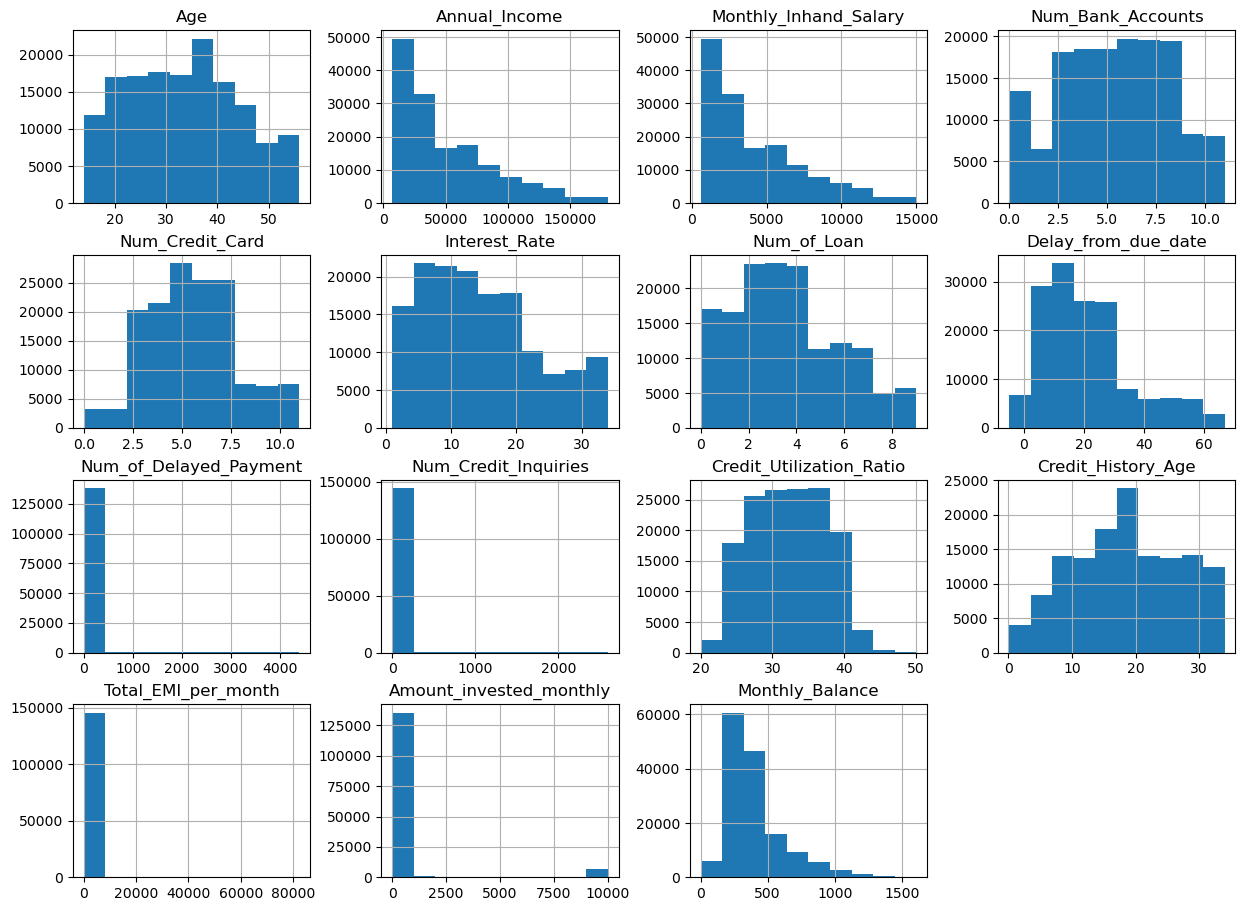

In [17]:
df.hist(figsize = (15,11))

In [70]:
fig = make_subplots(
    rows=4, cols=6,
    specs=[[{"colspan": 3}, None, None, {"colspan": 3}, None, None],
            [None, {"type": "pie", "colspan": 1}, None, None, {"type": "pie", "colspan": 1}, None],
            [{"colspan": 2}, None, {"colspan": 2}, None, {"colspan": 2}, None],
            [{"colspan": 6}, None, None, None, {"type": "pie"}, None]],
    subplot_titles=("Percentage of representatives of a given age", 
                      "Percentage of representatives of occupation", 
                      "Percentage distribution of people with annual income in the given range (USD)",
                      "Percentage distribution of people with given credit score",
                      "Percentage of people with given number of bank accounts",
                      "Percentage of people with given number of credit cards",
                      "Number of loans taken out at a given month",
                      "Average earnings for every occupation (USD)",
                      ),
)

age = go.Bar(
    x=list(unique_age.keys()),
    y=list(unique_age.values()),
)

professions = go.Bar(
    x=list(occupations.keys()),
    y=list(occupations.values()),
    text=list(occupations.values()),
)

income_pie = go.Pie(
             labels=list(income.keys()),
             values=list(income.values()),
             textinfo='percent+label',
             textposition="outside"
            )

num_accounts = go.Bar(
    x=list(bank_accounts.keys()),
    y=list(bank_accounts.values()),
    text=list(bank_accounts.values()),
)

num_cards = go.Bar(
    x=list(credit_cards.keys()),
    y=list(credit_cards.values()),
    text=list(credit_cards.values()),
)

score = go.Pie(
             labels=list(credit_score.keys()),
             values=list(credit_score.values()),
             textinfo='percent+label',
             textposition="inside"
            )

months_bar = go.Bar(
    x=list(months.keys()),
    y=list(months.values())
)

avg_earnings = go.Bar(
    x=list(earnings.keys()),
    y=list(earnings.values())
)

fig.add_trace(age, row=1, col=1)
fig.add_trace(professions, row=1, col=4)
fig.add_trace(avg_earnings, row=4, col=1)
fig.add_trace(income_pie, row=2, col=2)
fig.add_trace(num_accounts, row=3, col=1)
fig.add_trace(num_cards, row=3, col=3)
fig.add_trace(months_bar, row=3, col=5)
fig.add_trace(score, row=2, col=5)


fig.update_layout(xaxis1 = dict(tickmode = 'linear', tick0 = 0, dtick = 5,),
                  xaxis2 = dict(tickangle=30),
                  xaxis3 = dict(tickangle=30),
                  xaxis4 = dict(tickmode = 'linear', tick0 = 0, dtick = 1,),
                  xaxis5 = dict(tickmode = 'linear', tick0 = 0, dtick = 1,),
                  xaxis6 = dict(tickangle=30),
                  showlegend=False,
                  height=900,
                  margin=dict(l=40, r=40, t=70, b=0), 
                  yaxis1_ticksuffix = '%',
                  yaxis2_ticksuffix = '%',
                  yaxis3_ticksuffix = '%',
                  yaxis4_ticksuffix = '%',
                  )

fig.show()